# <span style="color:#3306B0">Modeling the addiction to e-cigarettes and vaping</span>
[Based on the [2019 M3 Challenge problem](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-problem-one-is-too-many-and-a-thousand-not-enough-substance-use-and-abuse/) for high school students, and its [winning solutions](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-winning-solutions/)]

As cigarette smoking continues to decline in many parts of the 
world, there is a growing number of people turning to substitutes 
such as e-cigarettes and vaporizers.  Vaping is the use of such 
devices to inhale a vaporized form of a liquid contained in 
the device.  These liquids typically contain nicotine, flavorings, 
and other chemicals, some of which are known to be addictive and/or 
toxic.

Due to its addictive nature and potential health hazards, government 
authorities in some countries have started regulating the 
sale and use of vaping products.  In addition, there is growing 
interest in developing education programs, and in understanding 
why vaping addiction is more prevalent in certain groups of 
people than in others.  For instance, in the United States, 
students and young adults have been identified as the group 
most susceptible to vaping addiction.

In this lab, we consider the first part of the 
[2019 M3 Challenge problem](https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-problem-one-is-too-many-and-a-thousand-not-enough-substance-use-and-abuse/), 
which can be stated as follows: 


><span style="color:#033600">Often containing high 
doses of nicotine, vaping (inhalation of an aerosol created 
by vaporizing a liquid) is hooking a new generation that might 
otherwise have chosen not to use tobacco products. Build a mathematical 
model that predicts the spread of nicotine use due to vaping 
over the next 10 years. Analyze how the growth of this new form 
of nicotine use compares to that of cigarettes.
</span>

><span style="color:#033600">Multiple agencies collect 
a wealth of data on a regular basis. A portion of this data 
has been compiled and provided. You are not required to 
use this data; that is, you may choose to use none, some, 
or all of this data and/or any additional data sources you may 
identify while working on this problem. Be sure to cite all resources 
used.
</span>
- [High_school_vaping_data](https://m3challenge.siam.org/wp-content/uploads/high_school_vaping_data.xlsx)
- [NIH-DrugTrends-Data Sheet](https://m3challenge.siam.org/wp-content/uploads/NIH-DrugTrends-DataSheet-.xlsx)
- [A figure](https://m3challenge.siam.org/wp-content/uploads/Figure_Adult-per-capita-cigarette-consumption-and-major-smoking-and-health-events_US_1900_2012.pdf) is also provided for historical context of cigarette consumption.

## <span style="color:#336630">Model development</span> 
[Based on selected winning papers (https://m3challenge.siam.org/resources/archives/2019-year-at-a-glance/2019-winning-solutions/)

In the spirit of best practices, the M3 Challenge Contest recommends 
addressing each of the following components in the course of model 
development: clearly define the problem; state any assumptions 
made; identify the variables used;  construct the math model; 
analyze and assess the solutions.

### 1. Defining the problem

The goal of our problem may be stated as follows:

> We want to create a model to predict the spread of nicotine 
use in the United States from vaping over the next ten years.  We 
also want to analyze how the growth of vaping use compares with 
that of traditional cigarettes.

### 2. Strategy and assumptions

This problem can be approached in a couple of different ways. Perhaps 
the simplest (but not necessarily best) strategy is to 
curve fit and extrapolate past data on vaping.  Another 
strategy is to develop a differential equations system that 
accounts for the spread of vaping due to interactions between 
different groups of people in a community, analogous to 
the famous SIR model for the spread of epidemics.  We will 
follow a simplified from of this approach, as done by 
Team \#12300 in the M3 Challenge Contest.

The basic idea is to treat the use of nicotine from vaping like an 
epidemic disease that has infected certain people in 
the population.  The rest of the population is considered 
"susceptible" to becoming infected.  For modeling purposes, 
every individual in the population is classified as either 
`Infected` or `Susceptible`.  The number of people in each 
of these subgroups is then treated as a function of time (as 
shown in the sketch below) 
whose behavior can be modeled using differential equations.

<DIV ALIGN="CENTER">
<IMG SRC="./si_schematic.png"></IMG>
</DIV>

If vaping addiction is increasing, we expect $I(t)$ to be an 
increasing function and $S(t)$ to be a decreasing one.  The goal 
of the model is to determine exactly how $S$ and $I$ vary 
with time, by accounting for the key factors that cause people  
to move from one group to the other.  These models typically assume 
homogeneity within each group, and that any migration from one group to 
another occurs instantly (with no in-between state or transition 
delay).  In order to proceed in this direction, we will make 
the following simplifying assumptions, which are nicely 
summarized in the paper by Team 12300

 1. The probability of becoming addicted to vaping is uniform for 
 everyone in the population.  Although this may not be 100% true 
 (since our data suggests younger people are more prone to addiction) 
 it is a reasonable approximation.
 2. There are no transition states between the two groups -- every 
 individual is either addicted, or not addicted.
 3. The total population is $N(t) = S(t)+I(t)$.  When $N$ 
 increases, new members initially enter the $S$ subgroup.
 4. Members from $S$ migrate to $I$ in one of two ways: (i) 
 self-motivated curiosity, or interest in vaping; and 
 (ii) influence by friends or others who are currently in the 
 $I$ group.
 5. No member from the $I$ group migrates to the $S$ 
 group (in the timeframe of this model).
 
 
Note that 4 and 5 are special assumptions made by Team 12300, 
and we will do the same here in order to derive the same 
model.  With these assumptions in mind, we are now ready to 
build the model.
 
 
 ### 3. The model and its variables

To build a differential equations model for the behavior of 
$S(t)$ and $I(t)$, we focus on key factors that contribute to 
changes in $S$ and $I$ -- or, the numbers of susceptible and 
infected people.  In 
calculus terms, this is the same as saying we want to model 
the derivatives $\frac{dS}{dt}$ and $\frac{dI}{dt}$.  In other 
words, our model will have the form
$$
\begin{eqnarray}
  \frac{dS}{dt} = \mbox{terms that contribute to change in }S  \nonumber \\
  \frac{dI}{dt} = \mbox{terms that contribute to change in }I  \nonumber
\end{eqnarray}
$$

Following the strategy of Team 12300, 
we hypothesize that changes in $S$ primarily occur due to one 
of the following factors

1. The overall population increases with time, and this results in 
new members being added to $S$.
2. Over time, some members of $S$ will choose to become vape 
users out of their own curiosity or desire to try it.
3. Some members of $S$ will become vape users due to 
peer-pressure, or due to the influence of family or friends 
who are vape users.

Observe that factor 1 will produce a positive contribution to 
$\frac{dS}{dt}$, 
while 2 and 3 will produce negative contributions.  To account for 1, 
we assume the total population $N(t)$ grows at a constant rate 
$\alpha$, so that $\frac{dN}{dt} = \alpha N$.  Since all new members 
of the population are assumed to be vape-free, they will initially 
enter the $S$ group.  Therefore, factor 1 contributes the term 
$\alpha N$ to $\frac{dS}{dt}$.  For the United States, Team 12300 
estimated $\alpha = 0.0071$ per year, based on data indicating 
the net increase in the US population in 2017 was 0.71%.

Factors 2 and 3 both relate to the conversion of some members 
of $S$ into vape users.  Although it is easy to conceptualize these 
as two separate factors, in practice they are closely intertwined and 
it is difficult to estimate the corresponding numbers with any 
accuracy.  Nevertheless, Team 12300 has made an effort, and we 
will use their numerical estimates here.

To account for factor 2 (members who exit $S$ out of their 
own curiosity ) we will assume a certain constant fraction of 
current members do so.  The resulting contribution to 
$\frac{dS}{dt}$ is a term of the form $-\beta S$, where 
$\beta$ is a positive constant that denotes the fraction of 
members who exit.  A value of 
$\beta=0.0042$ per year was estimated by Team 12300.

Factor 3 deals with the conversion of some $S$ members as a 
result of  interactions with $I$.  It is common practice to model 
interaction terms as a product of the interacting variables, 
typically scaled by the total population.  Thus 
the contribution to $\frac{dS}{dt}$ would be a term of the form 
$-\frac{\gamma SI}{N}$.  The positive coefficient $\gamma$ is related to 
the rate at which the interactions lead to conversion from 
$S$ to $I$.  Team 12300 estimates $\gamma \approx 0.06$.  Putting 
together all 3 terms we get

$$
  \frac{dS}{dt} = \alpha N - \beta S - \frac{\gamma SI}{N}
$$

Now the model for $I$ becomes straightforward, since the only 
way changes can occur is when members of $S$ move to $I$.  Thus, 
we get
$$
  \frac{dI}{dt} = \beta S + \frac{\gamma SI}{N}
$$

The model for the total population is simply: $N = S+I$.

To summarize, here is our final model:
<div class="alert alert-block alert-info"><font size="+1">
$$
\begin{eqnarray}
  \frac{dS}{dt} & = & \alpha N - \beta S - \frac{\gamma SI}{N}   \\
  \frac{dI}{dt} & = & \beta S + \frac{\gamma SI}{N}  \\
  N & = & S+I
\end{eqnarray}
$$
</font>

The parameter values are $\alpha = 0.0071, 
\beta=0.0042, \gamma=0.06$ (all parameters are in per year units).
</div>

The initial values of $S$ and $I$ (at $t=0$) were estimated 
from published statistical data for the United States for the 
year 2019.  The corresponding values are 
$S(0)=311,900,260, ~ I(0)=16,416,150$, and $N(0)=S(0)+I(0)$.

This is an *Initial Value Problem* (or IVP), which can be solved 
numerically using a variety of methods.  The simplest of these 
is the forward Euler method, which we will use here.  The algorithm 
consists of simply replacing the derivatives by difference 
approximations, and advancing the solution forward step by step, 
starting from $t=0$.  Details can be found in any standard 
reference on numerical integration methods.  Given below is a 
Python implementation of the method, which was largely 
produced by 
<A HREF="https://chat.openai.com" target="_blank">ChatGPT</A> 
based on the following prompt:

<PRE><span style="color:#630600">
Help me write a Python code to numerically solve the following 
ODE system for $S, I, N$ using the forward Euler method

$$
  \frac{dS}{dt} = \alpha N - \beta S - \frac{\gamma SI}{N}  \nonumber  \\
  \frac{dI}{dt} = \beta S + \frac{\gamma SI}{N}  \nonumber  \\
  N = S + I  \nonumber
$$

The parameter values are $\alpha = 0.0071, \beta=0.0042, 
\gamma=0.06$, the initial conditions are $S(0)=311900260, 
I(0)=16416150, N(0)=S(0)+I(0)$.  I want to solve the system 
from $t=0$ to $t=10$.</span>
</PRE>

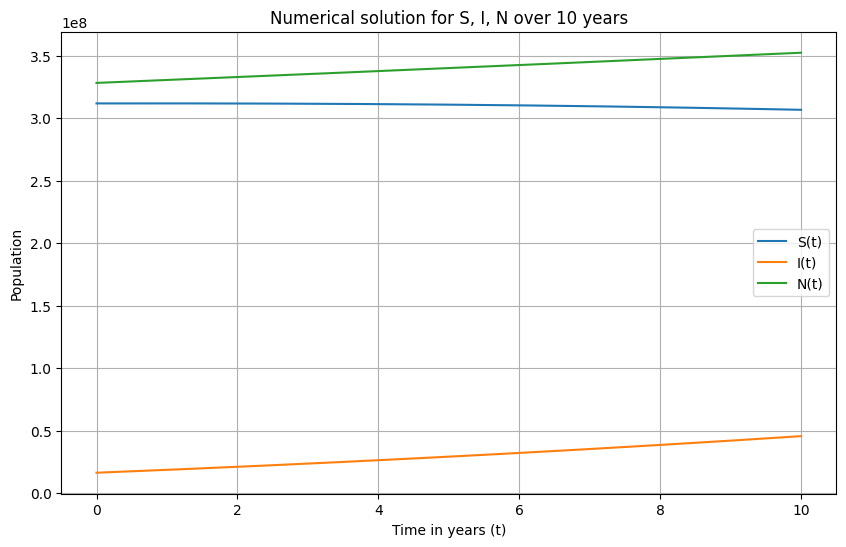

At t=0 we had: S(0)=311900260 (or 95.0%), and I(0)=16416150 (or 5.0%)
At t=10 the prediction is:
               S(10)=306794541 (or 87.0%), and I(10)=45678904 (or 13.0%)


In [18]:
# Load the needed libraries & assign nicknames
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 0.0071
beta = 0.0042
gamma = 0.06

# Define the initial conditions
S0 = 311900260
I0 = 16416150
N0 = S0 + I0

# Define the time parameters
t0 = 0
tf = 10
dt = 0.01  # time step size
num_steps = int((tf - t0) / dt)

# Initialize arrays to store the results
t_values = np.linspace(t0, tf, num_steps + 1)
S_values = np.zeros(num_steps + 1)
I_values = np.zeros(num_steps + 1)
N_values = np.zeros(num_steps + 1)

# Set the initial values
S_values[0] = S0
I_values[0] = I0
N_values[0] = N0

# Implement the forward Euler method
for step in range(num_steps):
    S = S_values[step]
    I = I_values[step]
    N = S + I  # Calculate N at the current step

    dS_dt = alpha * N - beta * S - (gamma * S * I) / N
    dI_dt = beta * S + (gamma * S * I) / N

    S_values[step + 1] = S + dS_dt * dt
    I_values[step + 1] = I + dI_dt * dt
    N_values[step + 1] = S_values[step + 1] + I_values[step + 1]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, label='S(t)')
plt.plot(t_values, I_values, label='I(t)')
plt.plot(t_values, N_values, label='N(t)')
plt.xlabel('Time in years (t)')
plt.ylabel('Population')
plt.title('Numerical solution for S, I, N over 10 years')
plt.legend()
plt.grid()
plt.show()

# Print some summary statistics to help interpret the results
print(f"At t=0 we had: S(0)={S0} (or {S0*100/N0:.1f}%), and \
I(0)={I0} (or {I0*100/N0:.1f}%)")
se = S_values[num_steps]
ie = I_values[num_steps]
ne = se + ie
print(f"At t=10 the prediction is:\n \
              S(10)={se:.0f} (or {se*100/ne:.1f}%), and \
I(10)={ie:.0f} (or {ie*100/ne:.1f}%)")

### <span style="color:#336630">4. Results and model assessment</span>

According to the results of the numerical simulation, our model 
predicts that after 10 years, nicotine use from vaping 
will increase from 5% to 13% of the population.  Thus, as a 
percentage of the population, vape users will more than 
double.  If we assume these results are reliable, it represents 
a significant increase, and a good reason for 
public health organizations to be alarmed about the trend.  To 
compare this with smoking of traditional cigarettes, data for 
the United States show smoking rates have been declining since 
the 1960s, when nearly 45% of the population smoked.  In 
2021, [data from Gallup](https://news.gallup.com/poll/509720/cigarette-smoking-rate-steady-near-historical-low.aspx) (see graph below) shows 
that about 12% of the population smokes.  If 
these trends continue, the use of nicotine through vaping will 
surpass smoking rates in the U.S. within the next 10 years.
<P></P>

<DIV ALIGN="CENTER">
<IMG SRC="./cigarette-smoking-rate-us.png" WIDTH="400"></IMG>
</DIV>



Let us now turn to the important question of model assessment: 
Should we trust this model and its predictions about vaping? What are 
the model's 
strengths and weaknesses?  As a first step towards addressing 
these questions, let us carry out an analysis of how sensitive 
the model is to changes in the parameter values. If parameter 
sensitivity is low, then we can be more confident in our predictions, 
since they will not change much if there are small errors in 
the parameters.  A numerical exploration of parameter sensitivity 
can be readily carried out by systematically varying each 
parameter and recomputing the solution for each value.  The Python 
code below varies each parameter by $\pm$25% from its estimated value 
(while keeping the other parameters fixed), and computes the 
effect on the solution.  The plots compare the predicted number 
of vape users for each parameter set.

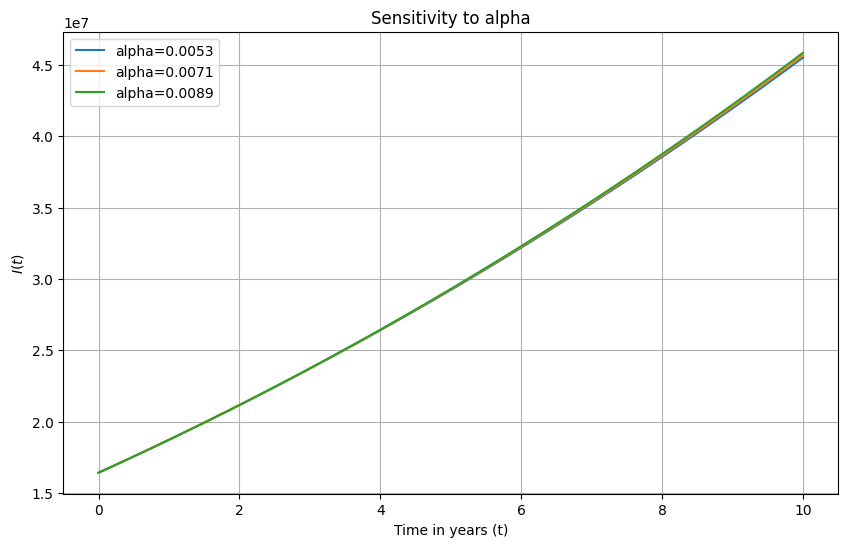

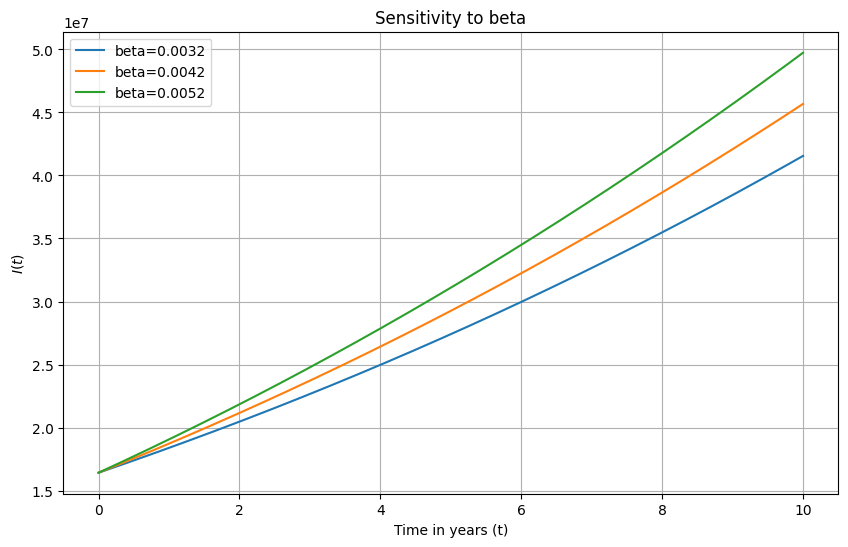

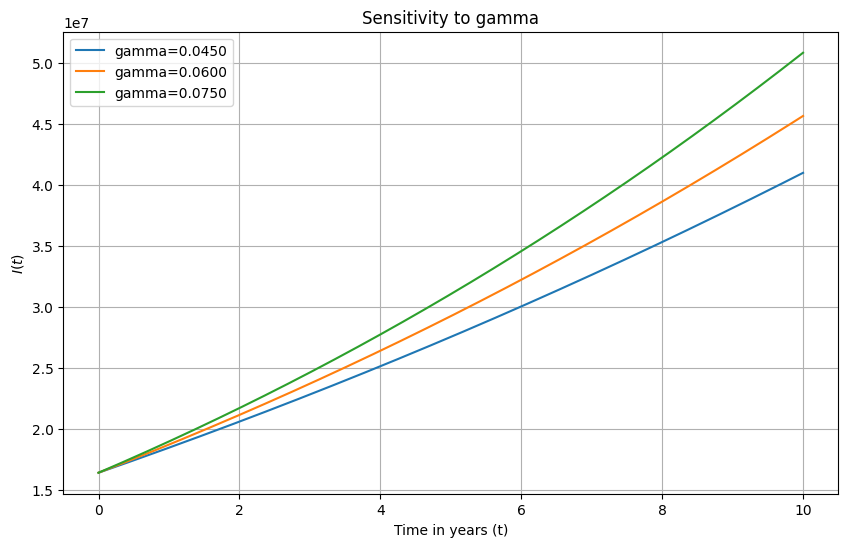

In [15]:
# Load the needed libraries & assign nicknames
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
alpha = 0.0071
beta = 0.0042
gamma = 0.06

# Define the initial conditions
S0 = 311900260
I0 = 16416150
N0 = S0 + I0

# Define the time parameters
t0 = 0
tf = 10
dt = 0.01  # time step size
num_steps = int((tf - t0) / dt)
t_values = np.linspace(t0, tf, num_steps + 1)

# Define a function to solve the ODE system using the forward Euler method
def solve_ode(alpha, beta, gamma):
    S_values = np.zeros(num_steps + 1)
    I_values = np.zeros(num_steps + 1)
    N_values = np.zeros(num_steps + 1)

    # Set the initial values
    S_values[0] = S0
    I_values[0] = I0
    N_values[0] = N0

    for step in range(num_steps):
        S = S_values[step]
        I = I_values[step]
        N = S + I  # Calculate N at the current step

        dS_dt = alpha * N - beta * S - (gamma * S * I) / N
        dI_dt = beta * S + (gamma * S * I) / N

        S_values[step + 1] = S + dS_dt * dt
        I_values[step + 1] = I + dI_dt * dt
        N_values[step + 1] = S_values[step + 1] + I_values[step + 1]

    return t_values, S_values, I_values, N_values

# Define parameter ranges for sensitivity analysis
alpha_range = np.linspace(0.75 * alpha, 1.25 * alpha, 3)
beta_range = np.linspace(0.75 * beta, 1.25 * beta, 3)
gamma_range = np.linspace(0.75 * gamma, 1.25 * gamma, 3)

# Plot the sensitivity to alpha
plt.figure(figsize=(10, 6))
for alpha_val in alpha_range:
    t, S, I, N = solve_ode(alpha_val, beta, gamma)
    plt.plot(t, I, label=f'alpha={alpha_val:.4f}')
plt.xlabel('Time in years (t)')
plt.ylabel('$I(t)$')
plt.title('Sensitivity to alpha')
plt.legend()
plt.grid()
plt.show()

# Plot the sensitivity to beta
plt.figure(figsize=(10, 6))
for beta_val in beta_range:
    t, S, I, N = solve_ode(alpha, beta_val, gamma)
    plt.plot(t, I, label=f'beta={beta_val:.4f}')
plt.xlabel('Time in years (t)')
plt.ylabel('$I(t)$')
plt.title('Sensitivity to beta')
plt.legend()
plt.grid()
plt.show()

# Plot the sensitivity to gamma
plt.figure(figsize=(10, 6))
for gamma_val in gamma_range:
    t, S, I, N = solve_ode(alpha, beta, gamma_val)
    plt.plot(t, I, label=f'gamma={gamma_val:.4f}')
plt.xlabel('Time in years (t)')
plt.ylabel('$I(t)$')
plt.title('Sensitivity to gamma')
plt.legend()
plt.grid()
plt.show()

### Interpreting the graphs

Inspecting the 3 graphs, we observe the largest difference 
in the computed solutions for vaping arises when $\gamma$ 
is varied.  For this case, the predicted number of vape users after 10 years 
varies from a low of about 41 million (when $\gamma=0.045$), 
to a high of 51 million (when $\gamma=0.075$).  This represents 
an error margin of 10 million, which is less than 3% of the total 
population of around 350 million.  However, it can be argued 
that a change from 41 million to 51 million also corresponds to 
a 25% increase in the number of vape users, which is certainly 
not small.  Thus, $\gamma$ is an important parameter, whose value 
must be estimated with a high degree of accuracy.

We also observe the model's sensitivity to the other parameters 
is lower.  In fact, it appears that a $\pm$25% change in $\alpha$ 
makes almost no difference to the predictions after 10 years.  However, 
the model does exhibit a bit more sensitivity to $\beta$, as the 
predictions vary by about 7 million when $\beta$ varies by $\pm$25%.

<P></P>

### More issues in model assessment

Beyond parameter sensitivity, what are some other concerns 
about using this model?  We feel there are at least a couple of 
important real-world scenarios that the model does not 
consider in a reliable way:

- In a 10-year timeframe there will, surely, be some vape users 
who will quit vaping, or perhaps die!  But our model for 
$\frac{dI}{dt}$ contains no negative term to account for those 
who exit the group.
- Although the model considers the effect of interactions between 
$I$ (vape users) and $S$ (non-users), it assumes those interactions 
will influence some members of $S$ to convert to $I$.  However, 
in the real-world it is likely some reverse conversions will also 
occur.  That is, a few members of $I$ will convert to $S$.  How 
do we include those reverse conversions in the model?  For example, 
could we simply adjust the value of $\gamma$ in some way to 
account for this?
- There are some inherent limitations to a 2-compartment model 
(dividing the population into 2 groups) like the one we're 
using here.  For instance, if we try to account for vape 
users quitting and becoming non-users, their only option is to 
join the $S$ group.  But that would imply they are susceptible 
again, and can be influenced to become vape addicts again, with 
the same probability as other members of $S$.  Is that realistic?

Adapt the 2-compartment model to account for some vape users 
quitting and becoming non-users.  Consider what factors 
might cause a current vape user to quit -- e.g., self-motivated 
desire to quit; influenced by non-user(s) or educational 
programs or $\ldots$. consolidate into 1-2 key factors 
and discuss how to include those in $\frac{dS}{dt}, \frac{dI}{dt}$ 
For instance, a self-motivated exit could be modeled as a 
constant rate of leaving the $I$ group, leading to a 
term of the form $-\rho I$ for some positive constant $\rho$.